# Machine Learning in Python for Neuroimaging

This notebook, presented by Desiree Lussier, is to provide an introduction to machine learning concepts for neurpimaging at Brainhack Global MTL. This first section of this document focusing on Scikit Learn has been adapted from the MAIN 2019 training given by Alexadre Hutton (https://github.com/main-training/main-training-nilearn-ml/blob/master/01_intro_ml.ipynb; https://github.com/main-training/main-training-nilearn-ml/blob/master/01_intro_ml_slides.odp) and sklearn tutorial (http://scipy-lectures.org/packages/scikit-learn/index.html). 

The second section forcusing on Nilearn has been adapted from the Machine Learning with Nilearn course for MAIN 2018 initially presented by Pierre Bellec, Elizabeth DuPre, Greg Kiar, and Jake Vogel (https://brainhack101.github.io/introML-book/intro) and MAIN 2019 presented by Gael Varoquaux and Alexa Pichet (https://github.com/main-training/main-training-nilearn-ml/blob/master/03_intro_to_nilearn.ipynb; https://github.com/main-training/main-training-nilearn-ml/blob/master/04_functional_connectivity_with_nilearn.ipynb) workshops. 

This training is meant to give a brief overview of the basics of machine learning in Python3 and apply them to neuroimaging. For more complete training or other specific examples please see the above MAIN courses (https://github.com/main-training) and documentation for Scikit Learn (https://scikit-learn.org/stable/) and Nilearn (https://nilearn.github.io/).

# Training Outline

__Machine Learning with Scikit Learn__<br>
-Machine learning classification examples<br>
-Model evaluation<br>
-Model complexity<br>
__Machine Learning for Neuroimaging__<br>
-Age classification based on functional connectomes<br>

# What is machine learning?

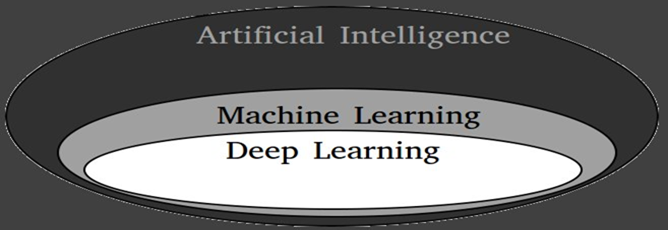

In __machine learning__ models with parameters which are __optimized__ according to previously-seen data.

Machine learning (ML) can be divided into subcategories:

__Supervised Learning__ <br>
We have observations X we want to use to predict Y <br>
X: data, features, inputs<br>
Y: target, labels, outputs<br>
The goal is to find a model which best predicts Y based on X:<br>
Y = f(X)<br>

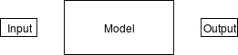

Models are further divided:<br>
-__Classification__: Predicting ordinal numbers; determining classes for inputs<br>
-__Regression__: Predicting continuous values

__Unsupervised Learning__<br>
We have observations X<br>
The goal is to extract information about X<br>
E.g.: finding a representation, cluster the data

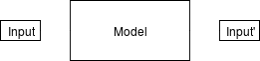 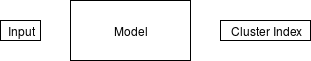

ML models are typically developed in some variation of:<br>
-Parameter training<br>
-Model evaluation<br>
-Model selection<br>
-Model generalization<br>

Let's start off by taking a look at some classification examples:

# Scikit-learn: Classification

Import relevant packages:

In [1]:
import sklearn
import numpy as np
from matplotlib import pyplot as plt

Scikit-learn ("sklearn") uses a common interface for its estimators (models). You create an instance of a model, fit it to your data by using model.fit(data, target), and you can then use it to make predictions using model.predict(new_data).

## Classification with Iris Dataset

Sklearn contains a number of example datasets. In this section, we'll look at the iris dataset, which contains information about different flowers and we will try to predict its species based on a few of the plant's features. Load the iris dataset and print its shape:

In [2]:
from sklearn.datasets import load_iris
iris = load_iris()
print(iris.data.shape)

(150, 4)


Sklearn uses the data structure convention of (n_samples, n_features). The iris dataset has 150 samples, with each sample having 4 features.  
Let's look at the first few samples:

In [3]:
print(iris.data[0:5])
print(iris.feature_names)

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


Let's also look at the target, or label of the data:

In [4]:
print(iris.target)
print(iris.target_names)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
['setosa' 'versicolor' 'virginica']


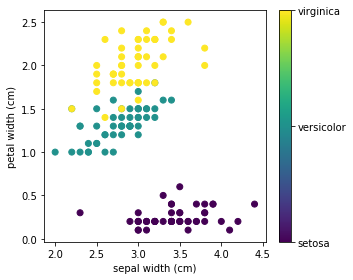

In [5]:
# From: http://scipy-lectures.org/packages/scikit-learn/auto_examples/plot_iris_scatter.html
# The indices of the features that we are plotting
x_index = 1
y_index = 3

# this formatter will label the colorbar with the correct target names
formatter = plt.FuncFormatter(lambda i, *args: iris.target_names[int(i)])

plt.figure(figsize=(5, 4))
plt.scatter(iris.data[:, x_index], iris.data[:, y_index], c=iris.target)
plt.colorbar(ticks=[0, 1, 2], format=formatter)
plt.xlabel(iris.feature_names[x_index])
plt.ylabel(iris.feature_names[y_index])

plt.tight_layout()
plt.show()

## Classification: k nearest neighbours: kNN

K nearest neighbors (kNN) is one of the simplest learning strategies: given a new, unknown observation, look up in your reference database which ones have the closest features and assign the predominant class. Let’s try it out on our iris classification problem:

In [6]:
# Get the data and target
from sklearn import neighbors
iris = load_iris()
X, y = iris.data, iris.target

In [7]:
# Instantiate the kNN model
knn = neighbors.KNeighborsClassifier(n_neighbors=1)
knn.fit(X, y)
# What kind of iris has 3cm x 5cm sepal and 4cm x 2cm petal?
print(iris.target_names[knn.predict([[3, 5, 4, 2]])])

['virginica']


And that's it! Our model, "knn" is now a trained classifier.

We can plot our class boundaries for our kNN classifier (from http://scipy-lectures.org/packages/scikit-learn/auto_examples/plot_iris_knn.html)

(4.2, 8.0, 1.9, 4.5)

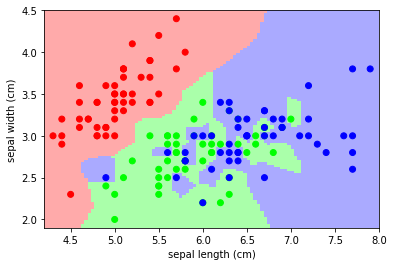

In [8]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn import neighbors, datasets
from matplotlib.colors import ListedColormap

# Create color maps for 3-class classification problem, as with iris
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

iris = datasets.load_iris()
X = iris.data[:, :2]  # we only take the first two features. We could
                    # avoid this ugly slicing by using a two-dim dataset
y = iris.target

knn = neighbors.KNeighborsClassifier(n_neighbors=1)
knn.fit(X, y)

x_min, x_max = X[:, 0].min() - .1, X[:, 0].max() + .1
y_min, y_max = X[:, 1].min() - .1, X[:, 1].max() + .1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                        np.linspace(y_min, y_max, 100))
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold)
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')
plt.axis('tight')

## Classification: Logistic Regression

Let's look at a different classifier: Logistic Regression (despite its name, it does classification)

In [9]:
from sklearn.linear_model import LogisticRegression
X, y = iris.data, iris.target
logit = LogisticRegression(multi_class='auto', solver='liblinear')
logit.fit(X, y)
# As before: What kind of iris has 3cm x 5cm sepal and 4cm x 2cm petal?
print(iris.target_names[logit.predict([[3, 5, 4, 2]])])

['virginica']


We get the same result as we did before. However, we're now faced with a critical question: How good are these models? How do we know how well they perform? Are these models reliable?

# Model Evaluation

## Dataset splitting

Datasets are typically divided into two or three subsets:<br>
__Training__<br>
-Used to optimize model parameters.<br>
__Validation__<br>
-Used to compare the performance of models<br>
-Model parameters are not directly exposed to this set<br>
__Test set__<br>
-Used to evaluate generalization
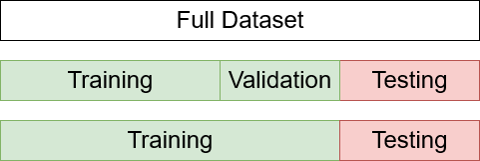

Sklearn provides us with many useful tools for manipulating and separating datasets. We'll first look at train_test_split, which splits data into training/test sets.

In [10]:
from sklearn.model_selection import train_test_split
X, y = iris.data, iris.target
print('X shape: {}'.format(X.shape))
print('y shape: {}'.format(y.shape))

X shape: (150, 4)
y shape: (150,)


In [11]:
# Split into training / testing sets. 
# We can specify the proportion we want in each set using the train_size and/or test_size parameters
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.6, test_size=0.4)
print('X_train shape: {}'.format(X_train.shape))
print('X_test shape: {}'.format(X_test.shape))
print('y_train shape: {}'.format(y_train.shape))
print('y_test shape: {}'.format(y_test.shape))

X_train shape: (90, 4)
X_test shape: (60, 4)
y_train shape: (90,)
y_test shape: (60,)


We now have two sets: one set we use to optimize our models, and another set to evaluate how they perform. Let's recreate our previous classifiers.  
Sklearn estimators have the *score* method, which allows us to quickly evaluate the model performance on a particular dataset:

In [12]:
# Instantiate and train our models
knn = neighbors.KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)
logit = LogisticRegression(multi_class='auto',solver='liblinear')
logit.fit(X_train, y_train)

# Evaluate our models!
knn_score = knn.score(X_test, y_test)
logit_score = logit.score(X_test, y_test)
print('kNN accuracy: {}'.format(knn_score))
print('logit accuracy: {}'.format(logit_score))

if(knn_score > logit_score):
    print('knn performs better!')
else:
    print('logit performs better!')
        

kNN accuracy: 0.9666666666666667
logit accuracy: 0.9333333333333333
knn performs better!


Try the following and rerun the previous cells:  
 1) Modify the "n_neighbors" parameter for the kNN classifier  
 2) Change the "train_size" and "test_size" parameters for the data split (they must sum to <= 1)  
 3) Add "stratify=y" to train_test_split so that the labels are balanced in the training and test sets  
 4) *Do nothing and just rerun them*  

Your model performance depends on the type of model you select and how much data is available for training/evaluation. The fourth point highlights something which is deceptively simple: your model performance also depends on which data points are present in your training and validation sets.  
  
The problem is similar when delving into model *hyperparameters*. Hyperparameters are parameters that are not directly optimized by the data, but that can have a huge impact on model performance. Hyperparameters are determined either by heuristic domain-specific information acquisition ("guessing") or preferably cross-validation.

## Cross-Validation

__Cross-validation__ is important for a number of reasons:<br>
-Evaluating model performance variability<br>
-Determining hyperparameters<br>
-Getting reviewers to leave you alone about doing cross-validation<br>

__K-fold cross-validation (CV)__ is one example.<br>
To do K-fold CV:<br>
-Take your training set
-Divide it into K equal subsets (“folds”)<br>
-Train on (K-1) folds, and evaluate on the remaining fold<br>
-Repeat K times for all folds<br>

Sklearn provides us with convenient functions for doing cross-validation: cross_val_score  
The function defaults to Kfold CV, but other methods are available through sklearn.model_selection

In [13]:
# Import cross validation function:
from sklearn.model_selection import cross_val_score
# Create the classifier:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.6, test_size=0.4)
logit = LogisticRegression(multi_class='auto', solver='liblinear')
logit_scores = cross_val_score(logit, X_train, y_train, cv=5)
print('Logit cross-validation scores: {}'.format(logit_scores))
print('Mean: {}'.format(np.mean(logit_scores)))
knn = neighbors.KNeighborsClassifier(n_neighbors=1)
knn_scores = cross_val_score(knn, X_train, y_train, cv=5)
print('knn cross-validation scores: {}'.format(knn_scores))
print('Mean: {}'.format(np.mean(knn_scores)))

Logit cross-validation scores: [0.9        1.         0.94117647 0.94117647 1.        ]
Mean: 0.9564705882352941
knn cross-validation scores: [1.         1.         1.         0.94117647 1.        ]
Mean: 0.9882352941176471


# Model Complexity

## Bias / Variance Tradeoff

__Model complexity__ refers to the number of tunable parameters in a model. More complex models are able to represent more complicated relationships between the input and output. 

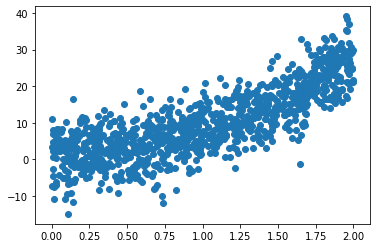

In [14]:
# From: http://scipy-lectures.org/packages/scikit-learn/auto_examples/plot_bias_variance.html
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

model = make_pipeline(PolynomialFeatures(degree=2), LinearRegression())
# Generate some synthetic data
def generating_func(x, err=5):
    return np.random.normal(np.power(x+1, 3), err)
X = 2*np.random.random(1000)
y = generating_func(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.5)
plt.figure()
plt.scatter(X, y)

C:\Users\desir\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


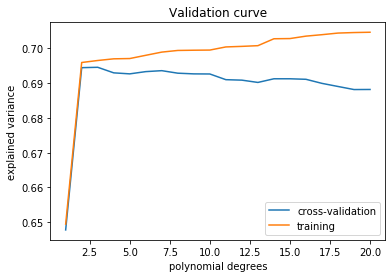

In [15]:
# Fit polynomials of increasing degrees:
from sklearn.model_selection import validation_curve
degrees = np.arange(1, 21)
model = make_pipeline(PolynomialFeatures(), LinearRegression())

# Vary the "degrees" on the pipeline step "polynomialfeatures"
train_scores, validation_scores = validation_curve(
                model, X[:, np.newaxis], y,
                param_name='polynomialfeatures__degree',
                param_range=degrees)

# Plot the mean train score and validation score across folds
plt.plot(degrees, validation_scores.mean(axis=1), label='cross-validation')  
plt.plot(degrees, train_scores.mean(axis=1), label='training')  
plt.legend(loc='best') 
plt.xlabel('polynomial degrees')
plt.ylabel('explained variance')
plt.title('Validation curve');

The plot is typical for machine learning models, and demonstrates the bias/variance tradeoff. The training performance (orange) peaks at a value, then decreases, indicating that the complex models are overfitting the training data.

**Bias error** refers to the error due to incorrect assumptions about the model. For example, fitting a data that follows x^3 using a model that uses x^2 will have some error that can't be improved by additional data.  
**Variance** refers to error caused by variance in the training set; a model whose parameters change significantly with small changes in the training set is susceptible to *overfitting*.  
  
**Task**: In the previous cells, try varying the amount of data, the degree of the polynomial in the generating function, and the error on the data to see the effect of these factors.

## Regularization

Regularization is a way to limit model complexity to what is helpful. This is done to avoid over-fitting and increase the interpretability of the model. It balances model performance with restrictions on model parameters.

[Ridge regression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html) uses linear regression (as before) along with a ridge regularizer (l2 loss on the weights)

C:\Users\desir\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


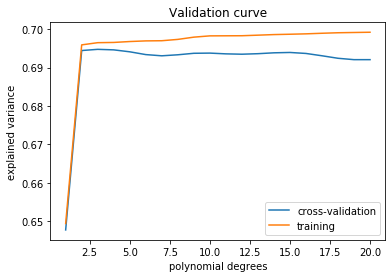

In [16]:
from sklearn.linear_model import Ridge
degrees = np.arange(1, 21)
model = make_pipeline(PolynomialFeatures(), Ridge(alpha=1))

# Vary the "degrees" on the pipeline step "polynomialfeatures"
train_scores, validation_scores = validation_curve(
                model, X[:, np.newaxis], y,
                param_name='polynomialfeatures__degree',
                param_range=degrees)
# Plot the mean train score and validation score across folds
plt.plot(degrees, validation_scores.mean(axis=1), label='cross-validation')  
plt.plot(degrees, train_scores.mean(axis=1), label='training')  
plt.legend(loc='best') 
plt.xlabel('polynomial degrees')
plt.ylabel('explained variance')
plt.title('Validation curve');

Although the curves look similar to before, the variation with the polynomial degrees is much less drastic than before. Regularization is an effective way of trading variance for bias.
Many sklearn estimators use regularization by default: our logistic regression from a previous exercise, for example, uses l2 regularization.

# Machine Learning for Neuroimaging: Classifying children vs adults using functional connectivity

We will integrate what we've learned in the previous sections to extract data from resting-state functional images, and use that data as features to classify participants.

We will use a dataset consisting of children (ages 3-13) and young adults (ages 18-39). Using brain connectivity matrices from resting-state functional imaging, we will try to predict who are adults and who are children.

Here is an overview of the different steps we will perform:



From the resting-state images (4D images), we will extract time series of brain signal and generate matrices of functional connectivity. Functional connectivity will be used as features to build our prediction model of who is a child or who is an adult (Diagnosis step on the image).

In [17]:
# Let's keep our notebook clean, so it's a little more readable!
import warnings
warnings.filterwarnings('ignore')

In [18]:
# Make sure you have the latest version of nilearn, which contains the dataset used for this workshop
#pip install nilearn==0.6.0b0
import nilearn

### Step 1: Loading the data

In [19]:
from nilearn import datasets

development_dataset = datasets.fetch_development_fmri(n_subjects=90) 
#The whole dataset consists of 155 participants, let's use 90 to save time

Let's see what the dataset contains and how many subjects we have:

In [20]:
print(development_dataset.description)
len(development_dataset.func)

b"The movie watching based brain development dataset (fMRI)\n\n\nNotes\n-----\nThis functional MRI dataset is used for teaching how to use\nmachine learning to predict age from naturalistic stimuli (movie)\nwatching with Nilearn.\n\nThe dataset consists of 50 children (ages 3-13) and 33 young adults (ages\n18-39). This dataset can be used to try to predict who are adults and\nwho are children.\n\nThe data is downsampled to 4mm resolution for convenience. The original\ndata is downloaded from OpenNeuro.\n\nFor full information about pre-processing steps on raw-fMRI data, have a look\nat README at https://osf.io/wjtyq/\n\nFull pre-processed data: https://osf.io/5hju4/files/\n\nRaw data can be accessed from : https://openneuro.org/datasets/ds000228/versions/1.0.0\n\nContent\n-------\n    :'func': functional MRI Nifti images (4D) per subject\n    :'confounds': TSV file contain nuisance information per subject\n    :'phenotypic': Phenotypic informaton for each subject such as age,\n        

90

Now let's load the phenotype data:

In [21]:
pheno=development_dataset.phenotypic
type(pheno)

numpy.ndarray

### Step 2- Generate connectivity matrices from brain signal

Here, we are going to use a brain parcellation to extract rsfMRI connectivity from every subject.
A brain parcellation consists of a set of ROI from which we want to extract brain signal. Each ROI has its own value and these values are treated as labels. 

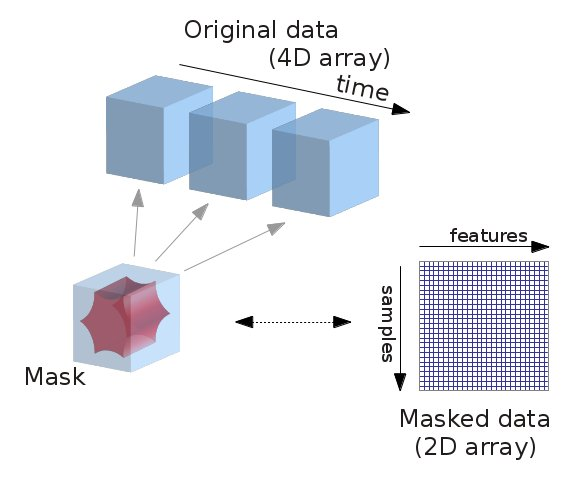

We will use nilearn.input_data.NiftiLabelsMasker to extract brain signal from each label.

In [22]:
from nilearn.input_data import NiftiLabelsMasker
from nilearn.connectome import ConnectivityMeasure
from nilearn import datasets

#First, let's load a parcellation that we'd like to use
multiscale = datasets.fetch_atlas_basc_multiscale_2015(version='sym')
atlas_filename = multiscale.scale064

print('Atlas ROIs are located in nifti image (4D) at: %s' %
       atlas_filename)

Atlas ROIs are located in nifti image (4D) at: C:\Users\desir/nilearn_data\basc_multiscale_2015\template_cambridge_basc_multiscale_nii_sym\template_cambridge_basc_multiscale_sym_scale064.nii.gz


We can have a look at the atlas we are using:

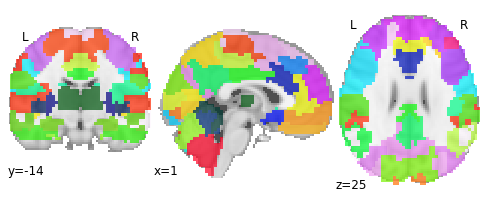

In [23]:
from nilearn import plotting

plotting.plot_roi(atlas_filename, draw_cross=False)

Now we extract the brain signal from our chosen brain parcellation. Here we will initialize the masker from which we will retrieve a 2D array.

In [24]:
masker = NiftiLabelsMasker(labels_img=atlas_filename, standardize=True, 
                           memory='nilearn_cache', verbose=0)

Each ROI (label) becomes a mask from which we extract brain signal all 4D fMRI brain images. In other words, we get a matrix of time series of brain signal in each label from our brain parcellation, as visualized above.

The next step is to build a "connectome" from those time series, i.e. a map of the connections in the brain. Since we’re working with functional data, however, we don’t have access to actual connections. Instead, we’ll use a measure of statistical dependency to infer the (possible) presence of a connection.

For this we’ll use Pearson’s correlation as our measure of statistical dependency and calculate how all of our ROIs from our chosen parcellation correlate with one another.

In [25]:
# initialize correlation measure, to build a "connectome"
#set to vectorize (ready for our predictive model later on!)
correlation_measure = ConnectivityMeasure(kind='correlation', vectorize=True,
                                         discard_diagonal=True)

In [26]:
# Different options for connectivity: matrix or vector 
vectorized = ConnectivityMeasure(kind='correlation', vectorize=True, discard_diagonal=True)
not_vectorized = ConnectivityMeasure(kind='correlation', vectorize=False)

#### Generating connectivity matrix
Another important aspect in functional imaging is the effect of confounds, which can be regressed out. 
Let's generate data for one participant as an example and compare the difference when removing confounds or not!

In [27]:
# example with one participant
sub = development_dataset.func[0]
conf = development_dataset.confounds[0]

# Extract brain signal while removing confounds
time_series = masker.fit_transform(sub, confounds=conf)

Let's create the "connectome" or connectivity matrix and visualize it:

In [28]:
matrix_removed_conf = not_vectorized.fit_transform([time_series])[0]

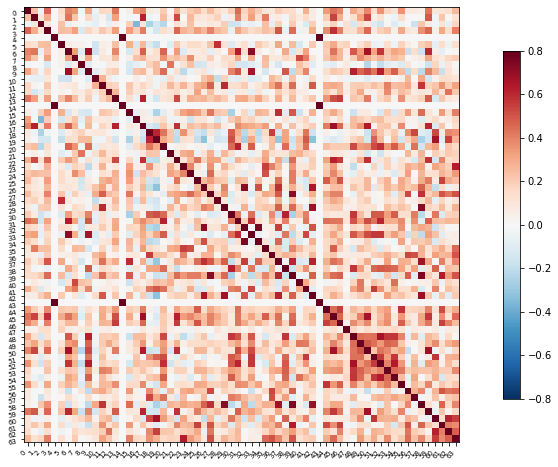

In [29]:
plotting.plot_matrix(matrix_removed_conf, figure=(10, 8), 
                     labels=range(time_series.shape[-1]),
                     vmax=0.8, vmin=-0.8, reorder=False)

plotting.show()

### Step 3 - Extracting brain features for all participants

Okay -- now we know how to generate brain signal without confounds and how to generate vectors that will be used as inputs in our machine learning model.

Let's apply those steps to our 90 participants!

**NOTE**: On a laptop, this might take a few minutes.

We will extract data for each participant sequentially and append the vectors one after another.

In [30]:
# simple example
container = []
for i in range(10):
    container.append(i)

container

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [31]:
all_features = [] # here is where we will put the data (a container)

# Iterate through all participants
for (func, confounds) in zip(development_dataset.func, development_dataset.confounds):
    # extract the timeseries from the ROIs in the atlas
    time_series = masker.fit_transform(func, confounds)
    # create a region x region correlation matrix
    correlation_matrix = correlation_measure.fit_transform([time_series])[0]

    # add to our container
    all_features.append(correlation_matrix)
    # keep track of status
    print('finished %s of %s'%(func,len(development_dataset.func)))

finished C:\Users\desir/nilearn_data\development_fmri\development_fmri\sub-pixar123_task-pixar_space-MNI152NLin2009cAsym_desc-preproc_bold.nii.gz of 90
finished C:\Users\desir/nilearn_data\development_fmri\development_fmri\sub-pixar124_task-pixar_space-MNI152NLin2009cAsym_desc-preproc_bold.nii.gz of 90
finished C:\Users\desir/nilearn_data\development_fmri\development_fmri\sub-pixar125_task-pixar_space-MNI152NLin2009cAsym_desc-preproc_bold.nii.gz of 90
finished C:\Users\desir/nilearn_data\development_fmri\development_fmri\sub-pixar126_task-pixar_space-MNI152NLin2009cAsym_desc-preproc_bold.nii.gz of 90
finished C:\Users\desir/nilearn_data\development_fmri\development_fmri\sub-pixar127_task-pixar_space-MNI152NLin2009cAsym_desc-preproc_bold.nii.gz of 90
finished C:\Users\desir/nilearn_data\development_fmri\development_fmri\sub-pixar128_task-pixar_space-MNI152NLin2009cAsym_desc-preproc_bold.nii.gz of 90
finished C:\Users\desir/nilearn_data\development_fmri\development_fmri\sub-pixar129_task

finished C:\Users\desir/nilearn_data\development_fmri\development_fmri\sub-pixar036_task-pixar_space-MNI152NLin2009cAsym_desc-preproc_bold.nii.gz of 90
finished C:\Users\desir/nilearn_data\development_fmri\development_fmri\sub-pixar037_task-pixar_space-MNI152NLin2009cAsym_desc-preproc_bold.nii.gz of 90
finished C:\Users\desir/nilearn_data\development_fmri\development_fmri\sub-pixar038_task-pixar_space-MNI152NLin2009cAsym_desc-preproc_bold.nii.gz of 90
finished C:\Users\desir/nilearn_data\development_fmri\development_fmri\sub-pixar039_task-pixar_space-MNI152NLin2009cAsym_desc-preproc_bold.nii.gz of 90
finished C:\Users\desir/nilearn_data\development_fmri\development_fmri\sub-pixar040_task-pixar_space-MNI152NLin2009cAsym_desc-preproc_bold.nii.gz of 90
finished C:\Users\desir/nilearn_data\development_fmri\development_fmri\sub-pixar041_task-pixar_space-MNI152NLin2009cAsym_desc-preproc_bold.nii.gz of 90
finished C:\Users\desir/nilearn_data\development_fmri\development_fmri\sub-pixar042_task

In [32]:
print(type(all_features))

#Convert list of features into a np array

import numpy as np
from numpy import array

X_features=array(all_features)

<class 'list'>


In [33]:
# Let's save the data to disk
import numpy as np
import os 
np.savez_compressed(os.path.join(os.curdir, 'BASC064_subsamp_features'),a = all_features)
X_features.shape

(90, 2016)

Okay so we've got our features from the connectivity matrices.

We can visualize our feature matrix:

Text(0, 0.5, 'subjects')

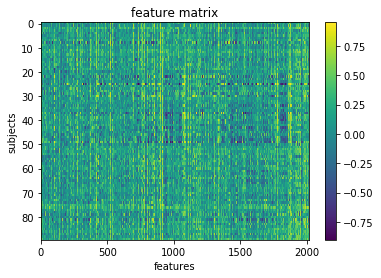

In [34]:
import matplotlib.pyplot as plt

plt.imshow(X_features, aspect='auto')
plt.colorbar()
plt.title('feature matrix')
plt.xlabel('features')
plt.ylabel('subjects')

### Get Y (our target --> child vs adults) and assess its distribution

In [35]:
len(pheno)

90

In [36]:
pheno

array([('sub-pixar123', 27.06      , 'Adult', 'adult', 'F', 'R'),
       ('sub-pixar124', 33.44      , 'Adult', 'adult', 'M', 'R'),
       ('sub-pixar125', 31.        , 'Adult', 'adult', 'M', 'R'),
       ('sub-pixar126', 19.        , 'Adult', 'adult', 'F', 'R'),
       ('sub-pixar127', 23.        , 'Adult', 'adult', 'F', 'R'),
       ('sub-pixar128', 27.        , 'Adult', 'adult', 'M', 'R'),
       ('sub-pixar129', 23.        , 'Adult', 'adult', 'F', 'R'),
       ('sub-pixar130', 21.        , 'Adult', 'adult', 'F', 'R'),
       ('sub-pixar131', 39.        , 'Adult', 'adult', 'M', 'R'),
       ('sub-pixar132', 22.        , 'Adult', 'adult', 'F', 'R'),
       ('sub-pixar133', 21.        , 'Adult', 'adult', 'M', 'R'),
       ('sub-pixar134', 25.        , 'Adult', 'adult', 'M', 'R'),
       ('sub-pixar135', 21.        , 'Adult', 'adult', 'F', 'R'),
       ('sub-pixar136', 25.        , 'Adult', 'adult', 'F', 'R'),
       ('sub-pixar137', 34.        , 'Adult', 'adult', 'F', 'R'),
       ('s

Looks like there is a column labeling children and adults. Let’s capture it in a variable

In [37]:
group = pheno['Child_Adult']

In [38]:
group

array(['adult', 'adult', 'adult', 'adult', 'adult', 'adult', 'adult',
       'adult', 'adult', 'adult', 'adult', 'adult', 'adult', 'adult',
       'adult', 'adult', 'adult', 'adult', 'adult', 'child', 'child',
       'child', 'child', 'child', 'child', 'child', 'child', 'child',
       'child', 'child', 'child', 'child', 'child', 'child', 'child',
       'child', 'child', 'child', 'child', 'child', 'child', 'child',
       'child', 'child', 'child', 'child', 'child', 'child', 'child',
       'child', 'child', 'child', 'child', 'child', 'child', 'child',
       'child', 'child', 'child', 'child', 'child', 'child', 'child',
       'child', 'child', 'child', 'child', 'child', 'child', 'child',
       'child', 'child', 'child', 'child', 'child', 'child', 'child',
       'child', 'child', 'child', 'child', 'child', 'child', 'child',
       'child', 'child', 'child', 'child', 'child', 'child'], dtype='<U5')

Maybe we should have a look at the distribution of our target variable:

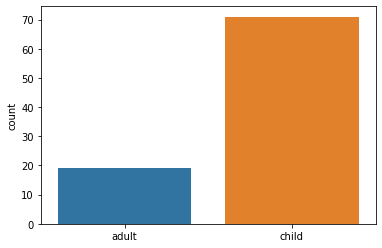

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.countplot(group)

We are a bit unbalanced -- there seems to be more children than adults. Let's convert the group into a numpy array and look at the counts:

In [40]:
import numpy as np 

y_ageclass=list(group)

print(y_ageclass.count("child"))
print(y_ageclass.count("adult"))

71
19


We now have our brain features (stored into "X_features") and our target variable (Child vs adults, stored into "y_ageclass") and are ready to construct our predictive model!

### Step 4 - Prepare data for predictive model

Here, we will define a training sample where we can play around with our models. We will also set aside a test sample that we will not touch until the end.

We want to be sure that our training and test sample are matched! We can do that with a stratified split. Specifically, we will stratify by age class.

In [41]:
from sklearn.model_selection import train_test_split

# Split the sample to training/test with a 70/30 ratio, and 
# stratify by age class, and also shuffle the data.

X_train, X_test, y_train, y_test = train_test_split(
                                                    X_features, # x
                                                    y_ageclass, # y
                                                    test_size = 0.3, # 70%/30% split  
                                                    shuffle = True, # shuffle dataset
                                                                    # before splitting
                                                    stratify = y_ageclass, # keep
                                                                           # distribution
                                                                           # of ageclass
                                                                           # consistent
                                                                           # betw. train
                                                                           # & test sets.
                                                    random_state = 123 # same shuffle each
                                                                       # time
                                                                       )

# print the size of our training and test groups
print('training:', len(X_train),
     'testing:', len(X_test))

training: 63 testing: 27


Let's visualize the distributions to be sure they are matched

Text(0.5, 1.0, 'Test')

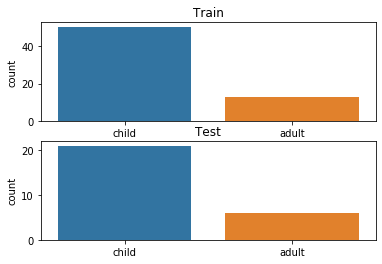

In [42]:
fig,(ax1,ax2) = plt.subplots(2)
sns.countplot(y_train, ax=ax1, order=['child','adult'])
ax1.set_title('Train')
sns.countplot(y_test, ax=ax2, order=['child','adult'])
ax2.set_title('Test')

Run your first model!

Machine learning can get pretty fancy pretty quickly. We'll start with a very standard classification model called a Support Vector Classifier (SVC).

While this may seem unambitious, simple models can be very robust. And we don't have enough data to create more complex models.

For more information, see this excellent resource: https://hal.inria.fr/hal-01824205

Quick review of SVM:

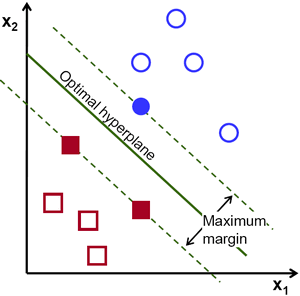

Let's fit our first model!

In [43]:
from sklearn.svm import SVC
l_svc = SVC(kernel='linear') # define the model

l_svc.fit(X_train, y_train) # fit the model

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

Let's see how well the model learned the data.

We can judge our model on several criteria:
* Accuracy: The proportion of predictions that were correct overall.
* Precision: Accuracy of cases predicted as positive
* Recall: Number of true positives correctly predicted to be positive
* f1 score: A balance between precision and recall

Or, for a more visual explanation...



In [44]:
from sklearn.metrics import classification_report, confusion_matrix, precision_score, f1_score

# predict the training data based on the model
y_pred = l_svc.predict(X_train)

# caluclate the model accuracy
acc = l_svc.score(X_train, y_train)

# calculate the model precision, recall and f1, all in one convenient report!
cr = classification_report(y_true=y_train,
                      y_pred = y_pred)

# get a table to help us break down these scores
cm = confusion_matrix(y_true=y_train, y_pred = y_pred) 
cm

array([[13,  0],
       [ 0, 50]], dtype=int64)

Let's view our results and plot them all at once!

accuracy: 1.0
              precision    recall  f1-score   support

       adult       1.00      1.00      1.00        13
       child       1.00      1.00      1.00        50

    accuracy                           1.00        63
   macro avg       1.00      1.00      1.00        63
weighted avg       1.00      1.00      1.00        63



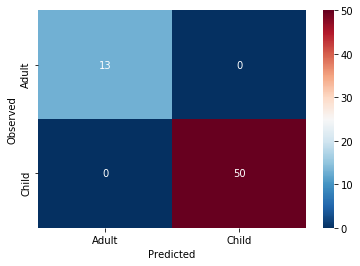

In [45]:
import itertools
from pandas import DataFrame

# print results
print('accuracy:', acc)
print(cr)

# plot confusion matrix
cmdf = DataFrame(cm, index = ['Adult','Child'], columns = ['Adult','Child'])
sns.heatmap(cmdf, cmap = 'RdBu_r')
plt.xlabel('Predicted')
plt.ylabel('Observed')
# label cells in matrix
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(i+0.5, j+0.5, format(cm[i, j], 'd'),
                 horizontalalignment="center",
                 verticalalignment="center",
                 color="white")

We can look at the accuracy of the predictions for each fold of the cross-validation:

In [46]:
from sklearn.model_selection import cross_val_predict, cross_val_score

# Generate cross-validated estimates for each input data point
y_pred = cross_val_predict(l_svc, X_train, y_train, 
                           groups=y_train, cv=10)

# Evaluate a score for each cross-validation fold
acc = cross_val_score(l_svc, X_train, y_train, 
                     groups=y_train, cv=10)

for i in range(10):
    print('Fold %s -- Acc = %s'%(i, acc[i]))

Fold 0 -- Acc = 1.0
Fold 1 -- Acc = 0.8571428571428571
Fold 2 -- Acc = 1.0
Fold 3 -- Acc = 1.0
Fold 4 -- Acc = 1.0
Fold 5 -- Acc = 1.0
Fold 6 -- Acc = 1.0
Fold 7 -- Acc = 0.8333333333333334
Fold 8 -- Acc = 1.0
Fold 9 -- Acc = 1.0


We can also look at the overall accuracy of the model:

In [47]:
from sklearn.metrics import accuracy_score
overall_acc = accuracy_score(y_pred = y_pred, y_true = y_train)
overall_cr = classification_report(y_pred = y_pred, y_true = y_train)
overall_cm = confusion_matrix(y_pred = y_pred, y_true = y_train)
print('Accuracy:',overall_acc)
print(overall_cr)

print('Confusion matrix:')
print(overall_cm)

Accuracy: 0.9682539682539683
              precision    recall  f1-score   support

       adult       1.00      0.85      0.92        13
       child       0.96      1.00      0.98        50

    accuracy                           0.97        63
   macro avg       0.98      0.92      0.95        63
weighted avg       0.97      0.97      0.97        63

Confusion matrix:
[[11  2]
 [ 0 50]]


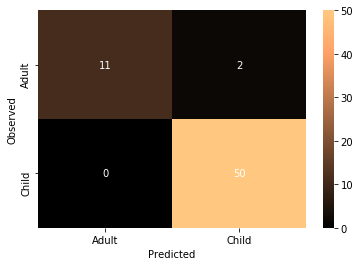

In [48]:
thresh = overall_cm.max() / 2
cmdf = DataFrame(overall_cm, index = ['Adult','Child'], columns = ['Adult','Child'])
sns.heatmap(cmdf, cmap='copper')
plt.xlabel('Predicted')
plt.ylabel('Observed')
for i, j in itertools.product(range(overall_cm.shape[0]), range(overall_cm.shape[1])):
        plt.text(j+0.5, i+0.5, format(overall_cm[i, j], 'd'),
                 horizontalalignment="center", verticalalignment="center",
                 color="white")

Not too bad at all!

### Tweak your model

It's very important to learn when and where its appropriate to "tweak" your model.

Since we have done all of the previous analysis in our training data, it's find to try different models. But we **absolutely cannot** "test" it on our left out data. If we do, we are in great danger of overfitting.

We could try other models, or tweak hyperparameters, but we are probably not powered sufficiently to do so, and would once again risk overfitting.

But as a demonstration, we could see the impact of "scaling" our data. Certain algorithms perform better when all the input data is transformed to a uniform range of values. This is often between 0 and 1, or mean centered around with unit variance. We can perhaps look at the performance of the model after scaling the data.

In [49]:
# Scale the training data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler().fit(X_train)
X_train_scl = scaler.transform(X_train)

Text(0, 0.5, 'subjects')

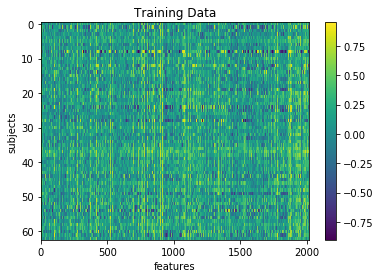

In [50]:
plt.imshow(X_train, aspect='auto')
plt.colorbar()
plt.title('Training Data')
plt.xlabel('features')
plt.ylabel('subjects')

Text(0, 0.5, 'subjects')

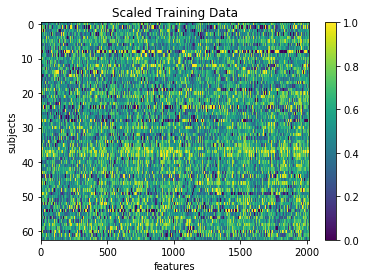

In [51]:
plt.imshow(X_train_scl, aspect='auto')
plt.colorbar()
plt.title('Scaled Training Data')
plt.xlabel('features')
plt.ylabel('subjects')

Repeat the steps above to re-fit the model and assess its performance, remembering to switch X_train to X_train_scl:

Accuracy: 0.9682539682539683
              precision    recall  f1-score   support

       adult       1.00      0.85      0.92        13
       child       0.96      1.00      0.98        50

    accuracy                           0.97        63
   macro avg       0.98      0.92      0.95        63
weighted avg       0.97      0.97      0.97        63

Confusion matrix:
[[11  2]
 [ 0 50]]


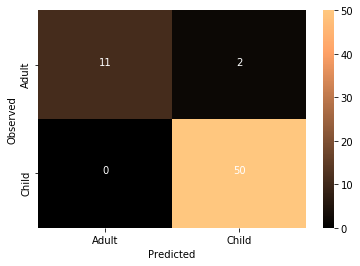

In [52]:
# predict
y_pred = cross_val_predict(l_svc, X_train_scl, y_train, 
                           groups=y_train, cv=10)

# get scores
overall_acc = accuracy_score(y_pred = y_pred, y_true = y_train)
overall_cr = classification_report(y_pred = y_pred, y_true = y_train)
overall_cm = confusion_matrix(y_pred = y_pred, y_true = y_train)
print('Accuracy:',overall_acc)
print(overall_cr)

print('Confusion matrix:')
print(overall_cm)

# plot
thresh = overall_cm.max() / 2
cmdf = DataFrame(overall_cm, index = ['Adult','Child'], columns = ['Adult','Child'])
sns.heatmap(cmdf, cmap='copper')
plt.xlabel('Predicted')
plt.ylabel('Observed')
for i, j in itertools.product(range(overall_cm.shape[0]), range(overall_cm.shape[1])):
        plt.text(j+0.5, i+0.5, format(overall_cm[i, j], 'd'),
                 horizontalalignment="center",
                 color="white")

What do you think about the results of this model compared to the non-transformed model?

### Can our model classify childrens from adults in completely un-seen data?
Now that we've fit a model we think has possibly learned how to classify childhood vs adulthood based on rs-fmri signal, let's put it to the test. We will train our model on all of the training data, and try to predict the age of the subjects we left out at the beginning of this section.

Because we performed a transformation on our training data, we will need to transform our testing data using the *same information!* 

Notice how we use the Scaler that was fit to X_train and apply to X_test, rather than creating a new Scaler for X_test:

accuracy = 0.9259259259259259
              precision    recall  f1-score   support

       adult       1.00      0.67      0.80         6
       child       0.91      1.00      0.95        21

    accuracy                           0.93        27
   macro avg       0.96      0.83      0.88        27
weighted avg       0.93      0.93      0.92        27

confusion matrix:
[[ 4  2]
 [ 0 21]]


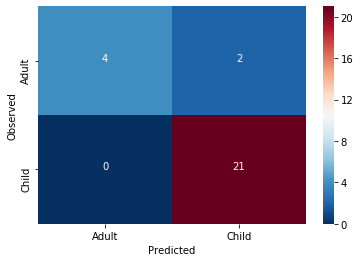

In [53]:
X_test_scl = scaler.transform(X_test)
l_svc.fit(X_train_scl, y_train) # fit to training data
y_pred = l_svc.predict(X_test_scl) # classify age class using testing data
acc = l_svc.score(X_test_scl, y_test) # get accuracy
cr = classification_report(y_pred=y_pred, y_true=y_test) # get prec., recall & f1
cm = confusion_matrix(y_pred=y_pred, y_true=y_test) # get confusion matrix

# print results
print('accuracy =', acc)
print(cr)

print('confusion matrix:')
print(cm)


# plot results
thresh = cm.max() / 2
cmdf = DataFrame(cm, index = ['Adult','Child'], columns = ['Adult','Child'])
sns.heatmap(cmdf, cmap='RdBu_r')
plt.xlabel('Predicted')
plt.ylabel('Observed')
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j+0.5, i+0.5, format(cm[i, j], 'd'),
                 horizontalalignment="center",
                 color="white")

***Congratulations!*** You just trained a predictive model that used functional connectivity data to classify participants.

